In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm.auto import tqdm
import random
tqdm.pandas()

Analyze each domain during redirect chain

In [4]:
# sort by the frequency of each domain

RECORDS_PATH = '../../output/domain_analysis/non_aff_each_domain/'
domain_lengths = {}

for each_domain in os.listdir(RECORDS_PATH):
    if each_domain.endswith(".csv"):
        # print("each_domain: ", each_domain)
        domain_path = os.path.join(RECORDS_PATH, each_domain)
        df = pd.read_csv(domain_path, on_bad_lines='skip')
        domain_lengths[each_domain[:-4]] = len(df)

# Sort domains by the number of rows (in descending order)
sorted_domains = sorted(domain_lengths.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted domains
results_df = pd.DataFrame(sorted_domains, columns=['domain', 'num_of_unique_urls'])

# Save the DataFrame to a CSV file
results_df.to_csv('../../output/domain_analysis/sorted_non_aff_domain_counts.csv', index=False)

Find all unique redirect chains (focus on domain)

In [3]:
RECORDS_PATH = '../../output/rule_based_others_yt'
DES_PATH = '../../output/domain_analysis'
all_domain_chains = []

for each_crawl in os.listdir(RECORDS_PATH):
    each_crawl_path = os.path.join(RECORDS_PATH, each_crawl)
    for file in os.listdir(each_crawl_path):
        if file == 'redirect_chains.csv':
            file_path = os.path.join(each_crawl_path, file)
            df = pd.read_csv(file_path, on_bad_lines='skip')
            df = df.drop_duplicates(subset=['visit_id', 'redirect_domain_total'])

            all_domain_chains.extend(df['redirect_domain_total'].tolist())
# Convert the list of tuples to a DataFrame
all_domain_chains_df = pd.DataFrame(all_domain_chains, columns=['redirect_domain_total'])


# Count the occurrences of each unique redirect domain chain and reset index to convert to DataFrame
domain_count_df = all_domain_chains_df['redirect_domain_total'].value_counts().reset_index()
domain_count_df.columns = ['redirect_domain', 'count']

# Save the domain counts to a new CSV file
output_path = os.path.join(DES_PATH, 'unique_non_aff_redirect_domain_chains.csv')
domain_count_df.to_csv(output_path, index=False)


In [2]:
RECORDS_PATH = '/home/data/chensun/affi_project/purl/output/domain_analysis/affiliate/yt_sort_by_landing_page_05_17.csv'
df = pd.read_csv(RECORDS_PATH)

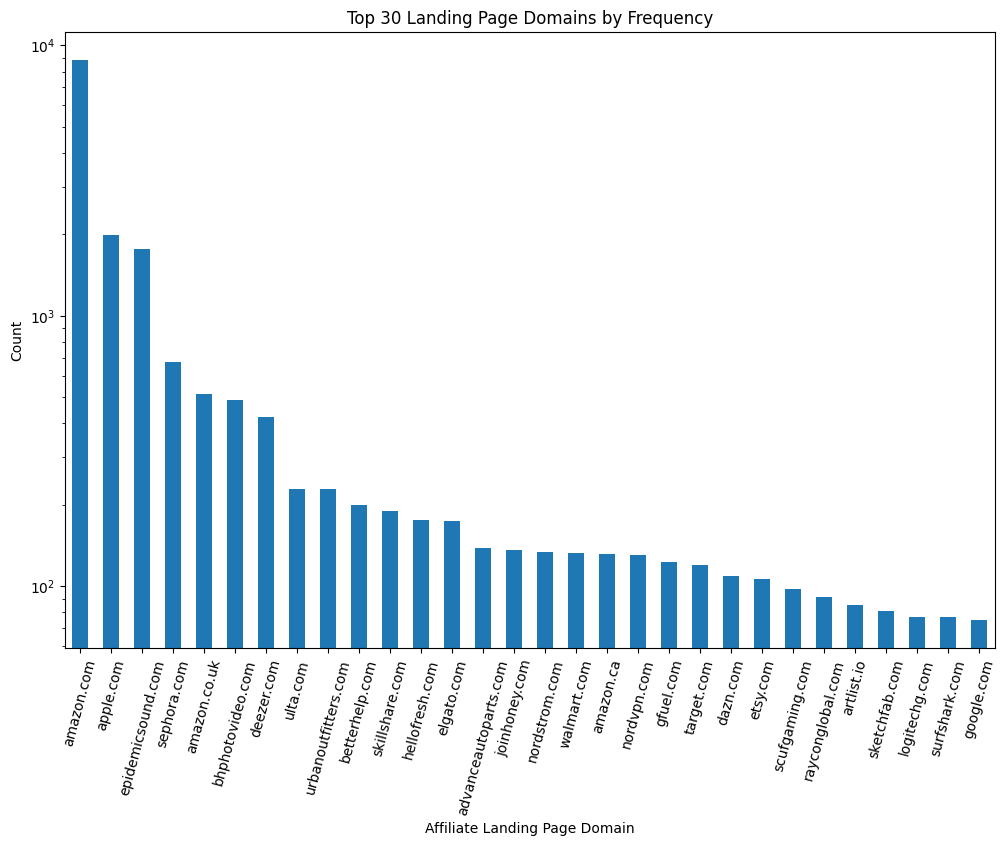

In [3]:
domain_counts = df['landing_page_domain'].value_counts()

# Selecting the top 30 domains
top_30_domains = domain_counts.head(30)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_30_domains.plot(kind='bar')
plt.xlabel('Affiliate Landing Page Domain')
plt.ylabel('Count')
plt.title('Top 30 Landing Page Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=75)  # Rotate labels for better readability
plt.show()


In [4]:
landing_page_domain = df['landing_page_domain'].nunique()
print(f"Number of unique landing page domains in affiliate links: {landing_page_domain}")

Number of unique landing page domains in affiliate links: 700


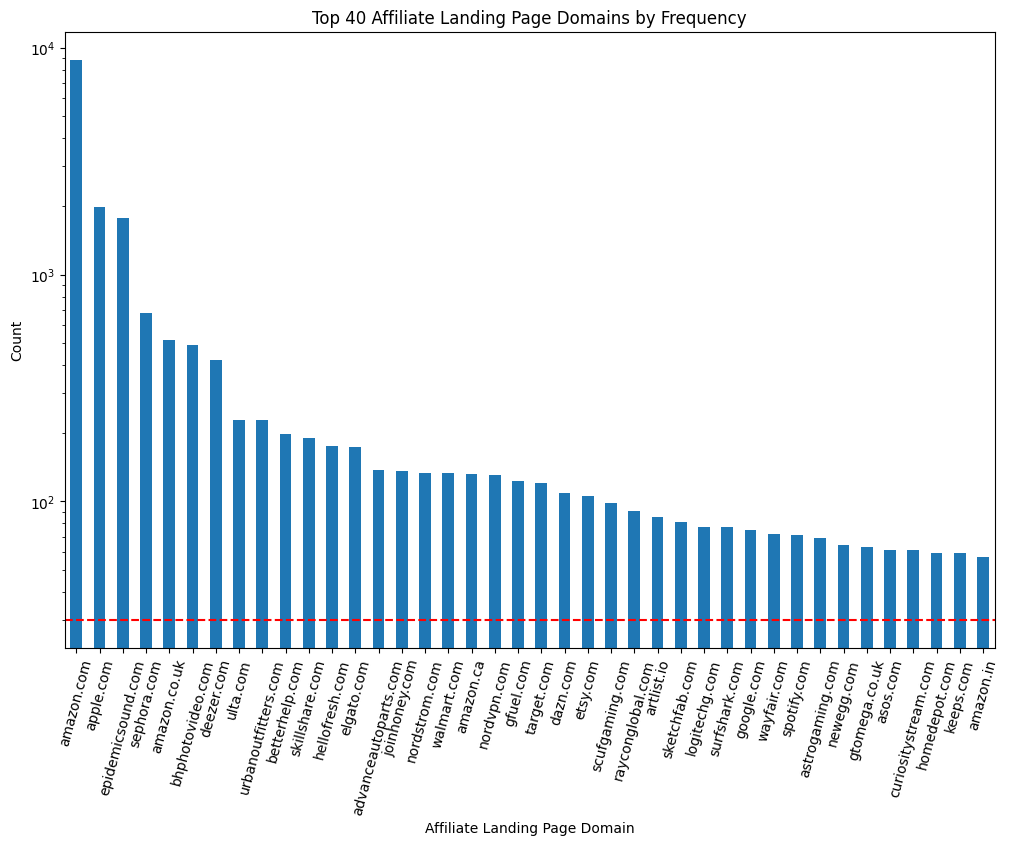

In [18]:

# Assuming df is your DataFrame
domain_counts = df['landing_page_domain'].value_counts()

# Selecting the top 40 domains
top_40_domains = domain_counts.head(40)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_40_domains.plot(kind='bar')
plt.xlabel('Affiliate Landing Page Domain')
plt.ylabel('Count')
plt.title('Top 40 Affiliate Landing Page Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=75)  # Rotate labels for better readability

# Add a horizontal line at y=30
plt.axhline(y=30, color='r', linestyle='--')

plt.show()

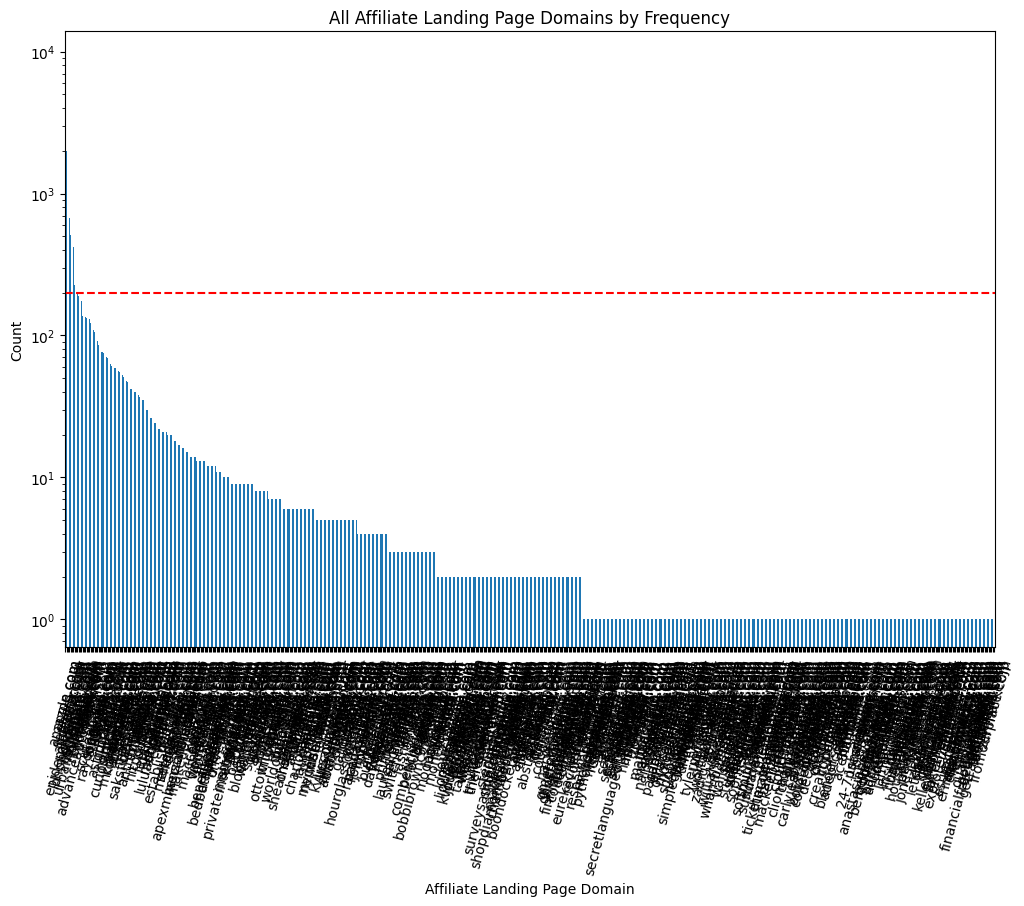

In [20]:
# Assuming df is your DataFrame
domain_counts = df['landing_page_domain'].value_counts()

# Selecting the top 40 domains
all_domains = domain_counts.head(700)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
all_domains.plot(kind='bar')
plt.xlabel('Affiliate Landing Page Domain')
plt.ylabel('Count')
plt.title('All Affiliate Landing Page Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=75)  # Rotate labels for better readability

# Add a horizontal line at y=30
plt.axhline(y=200, color='r', linestyle='--')

plt.show()

In [11]:
print(f"Total affiliate link: {len(df)}")

Total affiliate link: 21664


In [7]:
# dict of url_domain_frenquency
aff_landing_domain_counts = df.groupby('landing_page_domain')['url'].nunique()
print("Number of unique url domain: ", len(aff_landing_domain_counts))
domain_url_counts_dict = aff_landing_domain_counts.to_dict()
aff_sorted_domain_url_counts_dict = dict(sorted(domain_url_counts_dict.items(), key=lambda item: item[1], reverse=True))
print(f"URL domain frenquency on affiliate: {aff_sorted_domain_url_counts_dict}")

Number of unique url domain:  700
URL domain frenquency on affiliate: {'amazon.com': 8692, 'apple.com': 1962, 'epidemicsound.com': 1713, 'sephora.com': 674, 'amazon.co.uk': 512, 'bhphotovideo.com': 487, 'deezer.com': 421, 'ulta.com': 228, 'urbanoutfitters.com': 228, 'skillshare.com': 184, 'betterhelp.com': 181, 'hellofresh.com': 176, 'elgato.com': 172, 'advanceautoparts.com': 138, 'joinhoney.com': 135, 'nordstrom.com': 134, 'nordvpn.com': 131, 'amazon.ca': 130, 'walmart.com': 130, 'gfuel.com': 122, 'target.com': 120, 'dazn.com': 107, 'etsy.com': 106, 'scufgaming.com': 98, 'rayconglobal.com': 91, 'sketchfab.com': 81, 'artlist.io': 79, 'logitechg.com': 77, 'surfshark.com': 77, 'google.com': 73, 'wayfair.com': 72, 'astrogaming.com': 69, 'spotify.com': 67, 'gtomega.co.uk': 63, 'newegg.com': 62, 'asos.com': 61, 'curiositystream.com': 61, 'homedepot.com': 59, 'keeps.com': 59, 'amazon.in': 57, 'gtomega.com': 56, 'banggood.com': 54, 'everlane.com': 51, 'mcprohosting.com': 51, 'westelm.com': 50

In [38]:
# Sort domains by frequency, and choose top X domain  
# can be used for traning/testing  
cutoff_ratio = 0.02  # X
domain_counts = df['landing_page_domain'].value_counts()
print(len(domain_counts))
sorted_domains = domain_counts.index.tolist()
#print("sorted_domains: ", sorted_domains)
# Select domains for training based on cutoff ratio
cutoff = int(len(sorted_domains) * cutoff_ratio)
sorted_domains = set(sorted_domains[:cutoff])

df_top_domain = df[df['landing_page_domain'].isin(sorted_domains)]
top_domain_counts = df_top_domain['landing_page_domain'].value_counts()
print(f"Number of url in top {(1-cutoff_ratio)*100}% domain: {len(df_top_domain)}")
print(f"Number of landing domain in top {(1-cutoff_ratio)*100}% domain: {len(top_domain_counts)}")
print(f"They are: \n{top_domain_counts}\n")

not_in_top_domain = df[~df['landing_page_domain'].isin(sorted_domains)]
not_in_top_domain_counts = not_in_top_domain['landing_page_domain'].value_counts()
print(f"Number of url not in top {(1-cutoff_ratio)*100}% domain: {len(not_in_top_domain)}")
print(f"Number of landing domain not in top {(1-cutoff_ratio)*100}% domain: {len(not_in_top_domain_counts)}")

700
Number of url in top 98.0% domain: 16000
Number of landing domain in top 98.0% domain: 14
They are: 
amazon.com              8818
apple.com               1985
epidemicsound.com       1768
sephora.com              674
amazon.co.uk             514
bhphotovideo.com         487
deezer.com               421
ulta.com                 228
urbanoutfitters.com      228
betterhelp.com           199
skillshare.com           190
hellofresh.com           176
elgato.com               174
advanceautoparts.com     138
Name: landing_page_domain, dtype: int64

Number of url not in top 98.0% domain: 5664
Number of landing domain not in top 98.0% domain: 686


In [27]:
url_domain = df['url_domain'].nunique()
print(f"Number of unique url domains in affiliate links: {url_domain}")

Number of unique url domains in affiliate links: 225


In [28]:
# Initialize an empty DataFrame to store the selected URLs
selected_df = pd.DataFrame(columns=df.columns)  

# Get unique domain names
unique_domains = df['url_domain'].unique()

for domain in unique_domains:
    # Select URLs for the current domain
    domain_urls = df[df['url_domain'] == domain]['url']

    # Limit to 20 URLs if there are more than 20
    if len(domain_urls) > 30:
        selected_urls = domain_urls.sample(n=30, random_state=42)  # Adjust random_state as needed
    else:
        selected_urls = domain_urls

    # Append selected URLs to the DataFrame
    selected_df = pd.concat([selected_df, selected_urls])

print("Uniform distribution: ", len(selected_df))
print(selected_df.columns)

Uniform distribution:  1302
Index([                    0,          'Unnamed: 0',       'domain_counts',
       'landing_page_domain',    'landing_page_url',       'parent_domain',
           'parent_page_url',                 'url',          'url_domain',
                  'visit_id'],
      dtype='object')


In [12]:
AD_RECORDS_PATH = '/home/data/chensun/affi_project/purl/output/domain_analysis/others/yt_records_sort_by_landing_page_05_17.csv'
others_df = pd.read_csv(AD_RECORDS_PATH)

In [9]:
number_of_others = len(others_df)
print("number of others: ", number_of_others)

number of others:  303268


In [13]:
landing_page_domain = others_df['landing_page_domain'].nunique()
print(f"Number of unique landing page domains in others links: {landing_page_domain}")

Number of unique landing page domains in others links: 11120


In [15]:
non_aff_landing_url_domain = others_df['landing_page_domain'].nunique()
print(f"Number of unique url domains in others links: {non_aff_landing_url_domain}")

# dict of url_domain_frenquency
non_aff_landing_url_domain_counts = others_df.groupby('landing_page_domain')['url'].nunique()
domain_url_counts_dict = non_aff_landing_url_domain_counts.to_dict()
non_aff_sorted_domain_url_counts_dict = dict(sorted(domain_url_counts_dict.items(), key=lambda item: item[1], reverse=True))
print(non_aff_sorted_domain_url_counts_dict)

Number of unique url domains in others links: 11120
{'instagram.com': 36869, 'youtube.com': 28583, 'twitter.com': 24048, 'facebook.com': 20945, 'lnk.to': 10150, 'twitch.tv': 6044, 'spotify.com': 5290, 'patreon.com': 4630, 'soundcloud.com': 3306, 'amazon.com': 2830, 'tiktok.com': 2384, 'smarturl.it': 2190, 'google.com': 1973, 'ffm.to': 1329, 'reddit.com': 1248, 'vevo.com': 1204, 'espn.com': 1175, 'creator-spring.com': 1168, 'tumblr.com': 1160, 'supercell.com': 897, 'curseforge.com': 853, 'nbcsports.com': 834, 'paramountplus.com': 777, 'epidemicsound.com': 737, 'apple.com': 693, 'linktr.ee': 641, 'linkfire.com': 637, 'nba.com': 637, 'nebula.tv': 592, 'wwe.com': 577, 'cbsnews.com': 576, 'incompetech.com': 570, 'pinterest.com': 539, 'steampowered.com': 534, 'weibo.com': 480, 'gamebanana.com': 474, 'viewstats.com': 432, 'cameo.com': 421, 'tryguys.com': 417, 'peacocktv.com': 413, 'ibighit.com': 378, 'foxnews.com': 366, 'jype.com': 362, 'buzzfeed.com': 348, 'sidemenclothing.com': 339, 'empi.r

In [34]:
# Sort domains by frequency, and choose top X domain  
# can be used for traning/testing  
cutoff_ratio = 0.01  # X
others_domain_counts = others_df['landing_page_domain'].value_counts()
print(len(others_domain_counts))
others_sorted_domains = others_domain_counts.index.tolist()
#print("sorted_domains: ", sorted_domains)
# Select domains for training based on cutoff ratio
cutoff = int(len(others_sorted_domains) * cutoff_ratio)
others_sorted_domains = set(others_sorted_domains[:cutoff])

df_top_others_domain = others_df[others_df['landing_page_domain'].isin(others_sorted_domains)]
top_others_domain_counts = df_top_others_domain['landing_page_domain'].value_counts()
print(f"Number of url in top {(1-cutoff_ratio)*100}% domain: {len(df_top_others_domain)}")
print(f"Number of landing domain in top {(1-cutoff_ratio)*100}% domain: {len(top_others_domain_counts)}")
print(f"They are: \n{top_others_domain_counts}\n")

not_in_top_others_domain = others_df[~others_df['landing_page_domain'].isin(others_sorted_domains)]
not_in_top_others_domain_counts = not_in_top_others_domain['landing_page_domain'].value_counts()
print(f"Number of url not in top {(1-cutoff_ratio)*100}% domain: {len(not_in_top_others_domain)}")
print(f"Number of landing domain not in top {(1-cutoff_ratio)*100}% domain: {len(not_in_top_others_domain_counts)}")

11120
Number of url in top 99.0% domain: 222195
Number of landing domain in top 99.0% domain: 111
They are: 
youtube.com          62505
instagram.com        36913
twitter.com          24122
facebook.com         20989
lnk.to               10478
                     ...  
fcbarcelona.com        168
disneyplus.com         166
hoyolab.com            163
substack.com           163
hellothematic.com      162
Name: landing_page_domain, Length: 111, dtype: int64

Number of url not in top 99.0% domain: 81073
Number of landing domain not in top 99.0% domain: 11009


In [18]:
# Finding common domains
common_domains = set(aff_sorted_domain_url_counts_dict.keys()) & set(non_aff_sorted_domain_url_counts_dict.keys())

# Creating the table for common domains with frequencies in both dictionaries
table = []
for domain in common_domains:
    freq_in_aff = aff_sorted_domain_url_counts_dict[domain]
    freq_in_non_aff = non_aff_sorted_domain_url_counts_dict[domain]
    table.append([domain, freq_in_aff, freq_in_non_aff])

# Displaying the table
import pandas as pd
df = pd.DataFrame(table, columns=["Domain Name", "Frequency in Affiliates", "Frequency in Non-Affiliates"])
df.to_csv("../../output/domain_analysis/common_domain_in_Aff_nonAff.csv")
print(df)

                  Domain Name  Frequency in Affiliates  \
0                    etsy.com                       22   
1                   gfuel.com                       29   
2           independent.co.uk                        4   
3      competitivecyclist.com                       24   
4   customersurveysonline.com                        2   
..                        ...                      ...   
56                 artlist.io                       27   
57           amainhobbies.com                        4   
58        urbanoutfitters.com                      204   
59              supercell.com                       28   
60                 weverse.io                       49   

    Frequency in Non-Affiliates  
0                            99  
1                            76  
2                            18  
3                             2  
4                             1  
..                          ...  
56                           49  
57                            6

Count how many video id we crawl

In [11]:
others_df = df.merge(others_df, on=["parent_page_url"], how="outer")
df_unique_visit_id = others_df.drop_duplicates(subset=['parent_page_url'])
print("Number of unique video we crawl: ", len(df_unique_visit_id))
     

Number of unique video we crawl:  15588


In [35]:
# Randomly shuffle # of unique domain times
# Each round will pick one domain as unseen data set

total_unique_domains = ad_df['url_domain'].nunique()
num_trials = 10
print("Total unique domains:", total_unique_domains)

all_selected_domains_with_freq = []
all_selected_domains = set()

for _ in range(num_trials):
    selected_domains = {}
    unique_domains_list = ad_df['url_domain'].unique()
    # selected_unique_domains = random.sample(list(unique_domains_list), int(total_unique_domains * cutoff_ratio))
    selected_unique_domains = random.sample(list(unique_domains_list), 5)
    
    for domain in selected_unique_domains:
        domain_count = ad_df[ad_df['url_domain'] == domain]['url_domain'].count()
        selected_domains[domain] = domain_count
        all_selected_domains.add(domain)
    
    all_selected_domains_with_freq.append(selected_domains)

print(f"Total number of selected unique domain sets after {num_trials} trials:", len(all_selected_domains_with_freq))

for i in range(len(all_selected_domains_with_freq)):
    print(all_selected_domains_with_freq[i])

Total unique domains: 235
Total number of selected unique domain sets after 10 trials: 10
{'jetpackdigital.com': 5, 'contentsfeed.com': 7, 'stackadapt.com': 4, 'pressdemocrat.com': 1, 'adblade.com': 1}
{'nexttv.com': 1, 'zlinkd.com': 3, 'ftd.agency': 3, 'breedingpulverize.com': 1, 'ctengine.io': 2}
{'stereotyperobe.com': 1, 'woafoame.net': 1, 'grabo.bg': 1, 'rmhfrtnd.com': 1, 'irna.ir': 2}
{'nwmissourinews.com': 3, 'eacdn.com': 4, 'bluetoad.com': 1, 'horsebackbeatingangular.com': 1, 'odt.co.nz': 3}
{'docomo.ne.jp': 2, 'fvcwqkkqmuv.com': 1, 'logly.co.jp': 2, 'uatrav.com': 2, 'buysellads.com': 1}
{'mixi.media': 1, 'gml-grp.com': 2, 'goaserv.com': 1, 'nabjonline.org': 1, 'twinrdsrv.com': 1}
{'frap.site': 3, 'blg-1216lb.com': 3, 'stereotyperobe.com': 1, 'nordvpn.net': 1, '10bet.com': 2}
{'broadstreetads.com': 2, 'rhpedia.com': 2, 'dream.co.id': 2, 'trafficfactory.biz': 1, 'freshpops.net': 1}
{'clmbtech.com': 2, 'gaming-city.com': 1, 'zemanta.com': 14, 'avantlink.com': 2, 'lby2kd27c.com': 1

In [36]:
# Sort domains by frequency, and choose top X domain  
# can be used for traning/testing  
cutoff_ratio = 0.3  # X
domain_counts = ad_df['url_domain'].value_counts()
sorted_domains = domain_counts.index.tolist()
#print("sorted_domains: ", sorted_domains)
# Select domains for training based on cutoff ratio
cutoff = int(len(sorted_domains) * cutoff_ratio)
sorted_domains = set(sorted_domains[:cutoff])
print(f"Top {(1-cutoff_ratio)*100}% domain: {sorted_domains}")

ad_df_top_domain = ad_df[ad_df['url_domain'].isin(sorted_domains)]
print(f"Number of ad url in top {(1-cutoff_ratio)*100}% domain: {len(ad_df_top_domain)}")

ad_df_not_in_top_domain = ad_df[~ad_df['url_domain'].isin(sorted_domains)]
print(f"Number of ad url not in top {(1-cutoff_ratio)*100}% domain: {len(ad_df_not_in_top_domain)}")

Top 70.0% domain: {'xlviiirdr.com', 'lby2kd27c.com', 'dxmjyxksvc.com', 'pipaffiliates.com', 'doubleclick.net', 'idealmedia.io', 'yna.co.kr', 'serving-sys.com', 'chaturbate.com', 'googlesyndication.com', 'bestcontentprovider.top', 'mgid.com', 'quantserve.com', 'imv.az', 'aliexpress.com', 'advertserve.com', 'tsyndicate.com', 'postrelease.com', 'contentsfeed.com', 'orbsrv.com', 'adtng.com', 'prf.hn', 'revcontent.com', 'livesportmedia.eu', 'amazon-adsystem.com', 'ezodn.com', 'mfadsrvr.com', 'googleadservices.com', 'hhbypdoecp.com', 'openx.net', 'stackadapt.com', 'theshorthorn.com', 'magsrv.com', 'adroll.com', 'nwmissourinews.com', 'frap.site', 'dtiserv2.com', 'e-planning.net', 'adnxs.com', '51cto.com', 'wibtntmvox.com', 'nui.media', 'eghtesadonline.com', 'eacdn.com', 'pugsgivehugs.com', 'adskeeper.com', 'everesttech.net', 'nomorepecans.com', 'gsjln04hd.com', '3lift.com', 'ad.style', '14trackdomain.com', 'newmedia.az', 'adzerk.net', 'akmxts.com', 'jetpackdigital.com', 'adnuntius.com', 'zerg

In [37]:
# Initialize an empty DataFrame to store the selected URLs
selected_df = pd.DataFrame(columns=ad_df.columns)  

# Get unique domain names
unique_domains = ad_df['url_domain'].unique()

for domain in unique_domains:
    # Select URLs for the current domain
    domain_urls = ad_df[ad_df['url_domain'] == domain]['url']

    # Limit to 20 URLs if there are more than 20
    if len(domain_urls) > 30:
        selected_urls = domain_urls.sample(n=30, random_state=42)  # Adjust random_state as needed
    else:
        selected_urls = domain_urls

    # Append selected URLs to the DataFrame
    selected_df = pd.concat([selected_df, selected_urls])

print("Uniform distribution: ", len(selected_df))
print(selected_df.columns)

Uniform distribution:  909
Index([                    0,          'Unnamed: 0',       'domain_counts',
       'landing_page_domain',    'landing_page_url',       'parent_domain',
           'parent_page_url',     'parent_visit_id',                 'url',
                'url_domain',            'visit_id'],
      dtype='object')


How many url both label as affiliate and ads? 

In [42]:
aff_df = df
df_aff_with_underscore = aff_df[aff_df['visit_id'].str.contains('_')]
print("New crawled affiliate link: ", len(df_aff_with_underscore))

New crawled affiliate link:  801


In [41]:
aff_df = df

# Extract visit_ids from each dataframe
affiliate_visit_ids = set(aff_df['visit_id'])
ads_visit_ids = set(ad_df['visit_id'])
common_visit_ids = affiliate_visit_ids.intersection(ads_visit_ids)
print(common_visit_ids)
common_visit_id_count = len(common_visit_ids)
print(f"The number of visit_ids appearing in both affiliate and ads dataframes is: {common_visit_id_count}")

# Filter rows in the affiliate dataframe for common visit_ids
common_affiliate_rows = aff_df[aff_df['visit_id'].isin(common_visit_ids)]

# Filter rows in the ads dataframe for common visit_ids
common_ads_rows = ad_df[ad_df['visit_id'].isin(common_visit_ids)]

# Display the common rows for each dataframe
print("Common rows in affiliate dataframe:")
common_affiliate_rows.to_csv("../../output/results/02_21_uniform_Kfold_CV/common_aff_ads.csv")

print("\nCommon rows in ads dataframe:")
print(len(common_ads_rows))


{'3309802305959221_14', '5382901220674597_24', '4310387995808155_10', '964179629386589_23', '4310387995808155_8', '4310387995808155_9', '3309802305959221_13', '4310387995808155_5', '5818765497582470_7', '5382901220674597_14', '7747596029879428_13', '8905266577477404_2', '8519760202326216_4', '2170316223153412_5', '7491221905357315_9', '3309802305959221_22', '4310387995808155_17', '2031699304775711_3', '5382901220674597_18', '2170316223153412_9', '5382901220674597_21', '6722835587452366_22', '4310387995808155_4', '3309802305959221_10', '1445965741067189_2', '6395576380543090_15', '4310387995808155_13', '4310387995808155_15', '1445375841853598_4', '1330937556174663_3', '4982740783060212_5', '7491221905357315_7', '5382901220674597_16', '8128012699284643_3', '7272019448115452_25', '5382901220674597_15', '5382901220674597_20', '5087099864065618_4', '2170316223153412_6', '3309802305959221_9', '5382901220674597_27', '2170316223153412_3', '1928420329374394_12', '2773256365281961_25', '43103879

In [9]:
filtered_df = ad_df[ad_df['url_domain'] == 'revcontent.com']

# Printing the filtered DataFrame
print(filtered_df['url'])

225    https://smeagol.revcontent.com/cv/v3/IXUWtc123...
226    https://smeagol.revcontent.com/cv/v3/2yFPsr-D8...
227    https://smeagol.revcontent.com/cv/v3/xa_2dCbOC...
228    https://smeagol.revcontent.com/cv/v3/Dxu6tccSp...
229    https://smeagol.revcontent.com/cv/v3/L_GY4l4dX...
                             ...                        
678    https://smeagol.revcontent.com/cv/v3/mdqdVHhct...
683    https://smeagol.revcontent.com/v3/cdhuQUCZTZUj...
699    https://smeagol.revcontent.com/cv/v3/fa_L7APXt...
739    https://smeagol.revcontent.com/cv/v3/Lejom6yC5...
758    https://smeagol.revcontent.com/cv/v3/F3KZtCn41...
Name: url, Length: 62, dtype: object


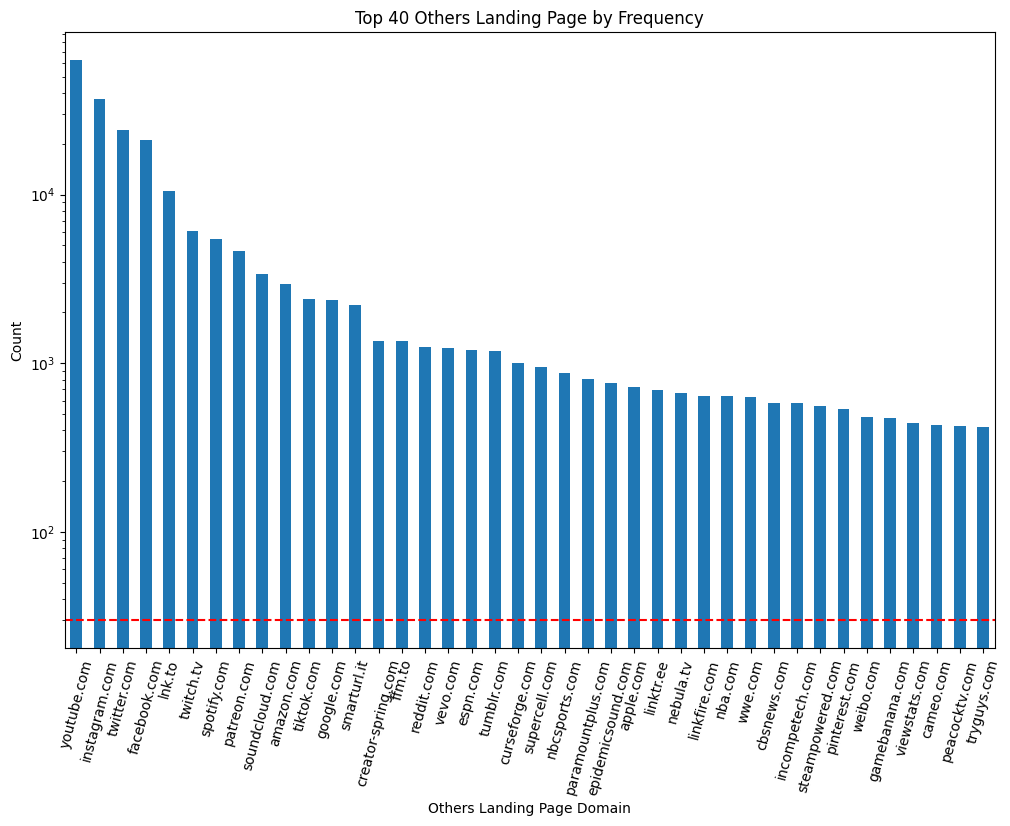

In [39]:
# Assuming df is your DataFrame
domain_counts = others_df['landing_page_domain'].value_counts()

# Selecting the top 40 domains
top_40_domains = domain_counts.head(40)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_40_domains.plot(kind='bar')
plt.xlabel('Others Landing Page Domain')
plt.ylabel('Count')
plt.title('Top 40 Others Landing Page by Frequency')
plt.yscale('log')
plt.xticks(rotation=75)  # Rotate labels for better readability

# Add a horizontal line at y=30
plt.axhline(y=30, color='r', linestyle='--')

plt.show()

In [18]:
landing_page_domain = ad_df['landing_page_domain'].nunique()
print(f"Number of unique landing page domains in ad links: {landing_page_domain}")

Number of unique landing page domains in ad links: 658


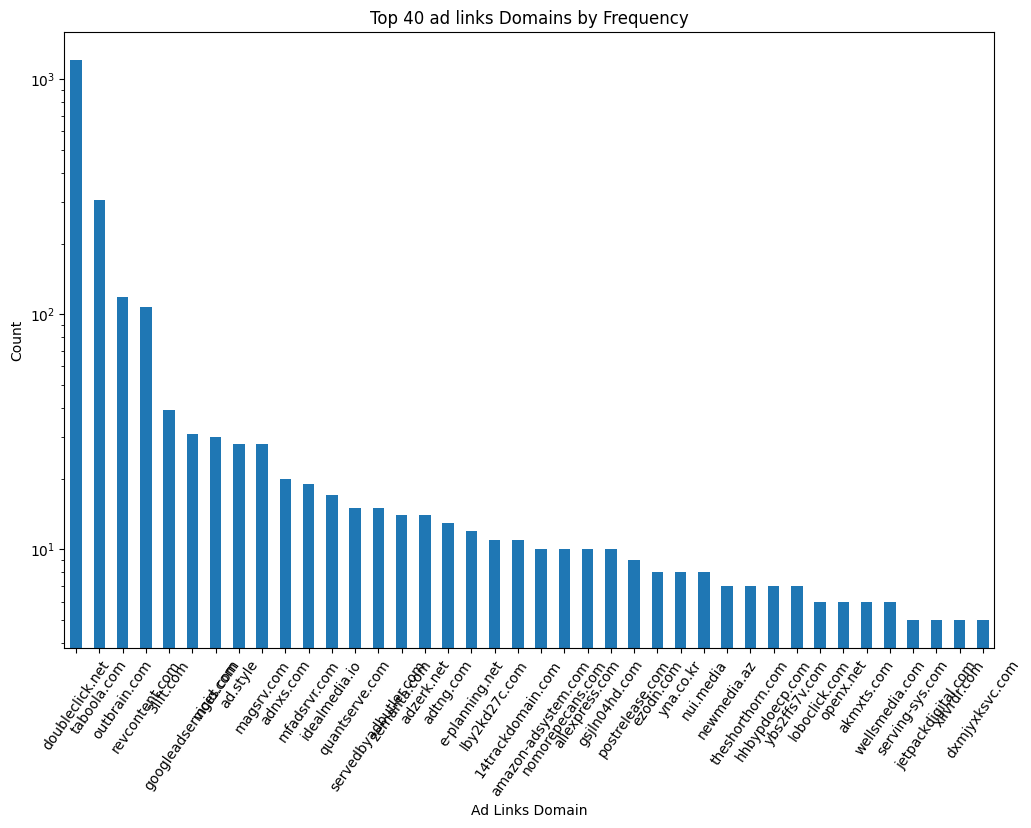

In [26]:
# Assuming df is your DataFrame
# Assuming df is your DataFrame
domain_counts = ad_df['url_domain'].value_counts()

# Selecting the top 30 domains
top_30_domains = domain_counts.head(40)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_30_domains.plot(kind='bar')
plt.xlabel('Ad Links Domain')
plt.ylabel('Count')
plt.title('Top 40 ad links Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=55)  # Rotate labels for better readability
plt.show()

In [21]:
url_domain = ad_df['url_domain'].nunique()
print(f"Number of unique url domains in ad links: {url_domain}")

Number of unique url domains in ad links: 136


In [15]:
path = "/home/data/chensun/affi_project/purl/output/ads/crawl_tranco_sites_100/label.csv"
df = pd.read_csv(path)
# Modify the "label" column
df.loc[df['label'] == 'affiliate', 'label'] = 'ads'

# Save the modified DataFrame back to the CSV file
df.to_csv('/home/data/chensun/affi_project/purl/output/ads/crawl_tranco_sites_100/label_modified.csv', index=False)